# Segment Data Using Hierarchical Clustering


# Challenge

# Task 1 

In [1]:
# Importing Required Liabraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [2]:
#Importing dataset
df1=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C6_S3_Cities_Data_Challenge.csv')
df1.head()

,City,Country
0,Oakland,United States
1,Oakville,Canada
2,Oaxaca de Juárez,Mexico
3,Oberhausen,Germany
4,Obihiro,Japan


In [3]:
df2=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C6_S3_WorldCities_Data_Challenge.csv')
df2.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [4]:
df3=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C6_S3_MoveHubCostOfLiving_Data_Challenge.csv')
df3.head()

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Lausanne,3.15,12.59,8.40,1.32,1714.00,4266.11
1,Zurich,3.28,12.59,8.40,1.31,2378.61,4197.55
2,Geneva,2.80,12.94,10.49,1.28,2607.95,3917.72
3,Basel,3.50,11.89,7.35,1.25,1649.29,3847.76
4,Perth,2.87,11.43,10.08,0.97,2083.14,3358.55


In [5]:
df4=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C6_S3_MoveHubQualityOfLife_Data_Challenge.csv')
df4.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86


In [6]:
#Renaming 'city' feature of the worldcities dataset (df2) as'City'

df2=df2.rename(columns={'city':'City'})
df2.head()

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [7]:
# Sorting the values of the 'populaion' of 'worldcities dataset (df2)' database in descending order

df2['population'].sort_values(ascending=False)

0       37977000.0
1       34540000.0
2       29617000.0
3       23355000.0
4       23088000.0
           ...    
9469           NaN
9470           NaN
9471           NaN
9472           NaN
9473           NaN
Name: population, Length: 26569, dtype: float64

In [8]:
#Removing the duplicate values of the city feature of the woldcities dataset by keeping the first value intact

df2.drop_duplicates(subset='City',keep='first',inplace=True)

# Task 2

In [9]:
#Merging all the data into a single object

data1=pd.merge(df1,df2,on='City')
data2=pd.merge(df3,df4,on='City')
df=pd.merge(data1,data2,on='City')
df.head()

,City,Country,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,...,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Orlando,United States,Orlando,28.4772,-81.3369,United States,US,USA,Florida,NaN,...,7.52,0.66,1176.78,2013.61,84.39,71.07,76.01,70.75,82.33,55.07
1,Oslo,Norway,Oslo,59.9111,10.7528,Norway,NO,NOR,Oslo,primary,...,12.32,1.57,2016.66,2800.92,82.09,52.51,88.19,29.39,71.27,35.53
2,Ottawa,Canada,Ottawa,45.4247,-75.6950,Canada,CA,CAN,Ontario,NaN,...,9.56,0.80,1020.02,2900.68,87.69,91.85,66.02,33.55,86.11,22.25
3,Oxford,United Kingdom,Oxford,51.7519,-1.2578,United Kingdom,GB,GBR,Oxfordshire,NaN,...,7.97,1.36,1494.67,1693.96,80.94,50.33,66.20,11.48,72.09,24.22
4,Quito,Ecuador,Quito,-0.2186,-78.5097,Ecuador,EC,ECU,Pichincha,primary,...,6.54,0.29,310.54,196.13,67.15,14.24,32.41,14.76,46.43,48.36


In [10]:
## Data Exploration

In [11]:
# shape of the dataset
print('The number of samples in data is {}.'.format(df.shape[0]))
print('The number of columns in data is {}.'.format(df.shape[1]))

The number of samples in data is 189.
The number of columns in data is 24.


In [12]:
# exploring the existing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 188
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   189 non-null    object 
 1   Country                189 non-null    object 
 2   city_ascii             189 non-null    object 
 3   lat                    189 non-null    float64
 4   lng                    189 non-null    float64
 5   country                189 non-null    object 
 6   iso2                   189 non-null    object 
 7   iso3                   189 non-null    object 
 8   admin_name             188 non-null    object 
 9   capital                140 non-null    object 
 10  population             189 non-null    float64
 11  id                     189 non-null    int64  
 12  Cappuccino             189 non-null    float64
 13  Cinema                 189 non-null    float64
 14  Wine                   189 non-null    float64
 15  Gasoli

In [13]:
# exploring the numeric data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,189.0,3.037615e+01,2.653546e+01,-4.353090e+01,2.132940e+01,4.069430e+01,4.925000e+01,6.344000e+01
lng,189.0,9.240169e+00,7.012665e+01,-1.578460e+02,-3.852750e+01,9.177500e+00,3.873690e+01,1.747833e+02
population,189.0,4.037046e+06,6.487168e+06,8.335000e+03,5.558050e+05,1.406000e+06,4.370000e+06,3.797700e+07
id,189.0,1.474223e+09,2.860600e+08,1.008162e+09,1.214636e+09,1.458989e+09,1.764069e+09,1.862748e+09
Cappuccino,189.0,1.999312e+00,7.411521e-01,4.600000e-01,1.320000e+00,2.090000e+00,2.490000e+00,4.480000e+00
Cinema,189.0,6.982011e+00,5.940213e+00,1.810000e+00,4.690000e+00,6.820000e+00,8.100000e+00,7.949000e+01
Wine,189.0,7.161164e+00,3.458427e+00,2.130000e+00,4.260000e+00,6.540000e+00,8.460000e+00,2.615000e+01
Gasoline,189.0,1.024339e+00,3.557210e-01,7.000000e-02,8.000000e-01,1.040000e+00,1.350000e+00,1.680000e+00
Avg Rent,189.0,1.120657e+03,6.734069e+02,1.206800e+02,6.321500e+02,9.964500e+02,1.458200e+03,5.052310e+03
Avg Disposable Income,189.0,1.427152e+03,8.984866e+02,1.206800e+02,5.870100e+02,1.534470e+03,2.045960e+03,4.266110e+03


In [14]:
# checking missing values in data
df.isnull().sum()

City                      0
Country                   0
city_ascii                0
lat                       0
lng                       0
country                   0
iso2                      0
iso3                      0
admin_name                1
capital                  49
population                0
id                        0
Cappuccino                0
Cinema                    0
Wine                      0
Gasoline                  0
Avg Rent                  0
Avg Disposable Income     0
Movehub Rating            0
Purchase Power            0
Health Care               0
Pollution                 0
Quality of Life           0
Crime Rating              0
dtype: int64

<AxesSubplot:>

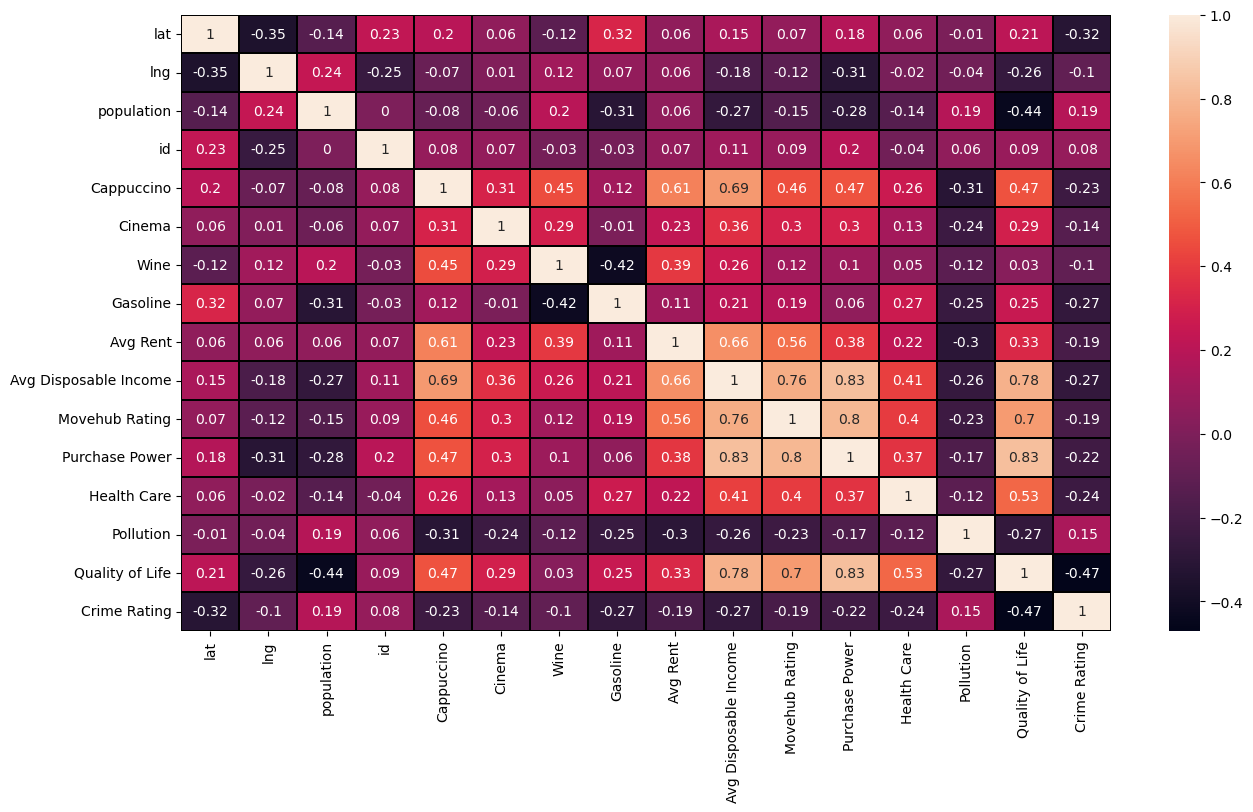

In [15]:
plt.figure(figsize=(15,8))
sb.heatmap(round(df.corr(),2),annot=True,linewidths=0.3,linecolor='black')

In [16]:
## Data Preprocessing

In [17]:
#Missing value treatment
df.capital.fillna(df['capital'].mode()[0],inplace=True)
df.admin_name.fillna(df['admin_name'].mode()[0],inplace=True)
df.isnull().sum()

City                     0
Country                  0
city_ascii               0
lat                      0
lng                      0
country                  0
iso2                     0
iso3                     0
admin_name               0
capital                  0
population               0
id                       0
Cappuccino               0
Cinema                   0
Wine                     0
Gasoline                 0
Avg Rent                 0
Avg Disposable Income    0
Movehub Rating           0
Purchase Power           0
Health Care              0
Pollution                0
Quality of Life          0
Crime Rating             0
dtype: int64

In [18]:
#Categorizing Categorical & Numeric Data Type
from tabulate import tabulate
cat=[]
con=[]
for i in df.columns:
    if df[i].nunique()<30:
        cat.append(i)
    else:
        con.append(i)

print(tabulate({'Categorical':cat,'Numerical':con},headers=['Categorical','Numerical']))

Categorical    Numerical
-------------  ---------------------
capital        City
               Country
               city_ascii
               lat
               lng
               country
               iso2
               iso3
               admin_name
               population
               id
               Cappuccino
               Cinema
               Wine
               Gasoline
               Avg Rent
               Avg Disposable Income
               Movehub Rating
               Purchase Power
               Health Care
               Pollution
               Quality of Life
               Crime Rating


In [19]:
#Label Encoding

lst=df.select_dtypes(include='object')
lbl=LabelEncoder()
for i in lst:
    df[i]=lbl.fit_transform(df[i])

In [20]:
#Data Scaling

data=df.drop(['lat','lng','id'],axis=1)
sc=StandardScaler()
df_scale=sc.fit_transform(data)
df_scale=pd.DataFrame(df_scale,columns=data.columns)

In [21]:
df_final=pd.concat([data,df[['lat','lng','id']]],axis=1)
df_final.head()

,City,Country,city_ascii,country,iso2,iso3,admin_name,capital,population,Cappuccino,...,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,lat,lng,id
0,128,75,128,74,73,74,47,2,1822394.0,1.96,...,2013.61,84.39,71.07,76.01,70.75,82.33,55.07,28.4772,-81.3369,1840015099
1,129,48,129,48,52,52,110,2,693494.0,3.36,...,2800.92,82.09,52.51,88.19,29.39,71.27,35.53,59.9111,10.7528,1578324706
2,130,12,130,12,13,13,109,2,989567.0,2.39,...,2900.68,87.69,91.85,66.02,33.55,86.11,22.25,45.4247,-75.6950,1124399363
3,131,74,131,73,28,28,111,2,154600.0,2.49,...,1693.96,80.94,50.33,66.20,11.48,72.09,24.22,51.7519,-1.2578,1826689568
4,139,21,139,20,22,22,114,2,2011388.0,1.22,...,196.13,67.15,14.24,32.41,14.76,46.43,48.36,-0.2186,-78.5097,1218441993


In [22]:
x=df_final

# Task : 3

In [23]:
X=df_final.iloc[:,[4,5]]
X.head()

,iso2,iso3
0,73,74
1,52,52
2,13,13
3,28,28
4,22,22


In [24]:
for i in range(2,8):
    for j in ['ward','single','complete','average']:
        hc=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage=j)
        y_hc=hc.fit_predict(X)
        print(i,j,silhouette_score(X,y_hc))

2 ward 0.6635775303219053
2 single -0.0073516388397407385
2 complete 0.5733937180588206
2 average 0.6632076616225419
3 ward 0.6059055737261572
3 single 0.3654983899291742
3 complete 0.5844387022371655
3 average 0.6277204309796361
4 ward 0.6225350566640833
4 single 0.37493935979020404
4 complete 0.5256662281532598
4 average 0.6196061333222262
5 ward 0.6231299490914594
5 single 0.08211109714979227
5 complete 0.49687766732252897
5 average 0.6054880137693385
6 ward 0.6103024991466491
6 single 0.055980731766392296
6 complete 0.5021765777734583
6 average 0.631713798224993
7 ward 0.6423637937685617
7 single 0.13104189796330742
7 complete 0.6134725367060988
7 average 0.6389952544354861


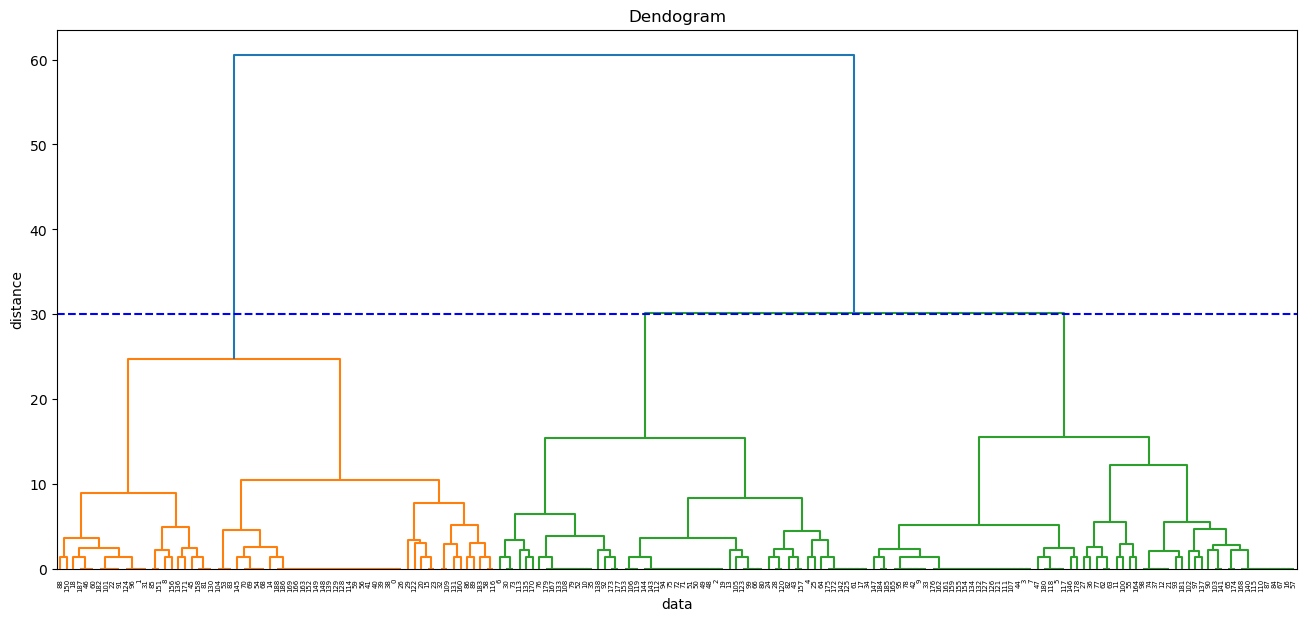

In [25]:
## Plotting Dendogram
plt.figure(figsize=(16,7))
sch.dendrogram(sch.linkage(X,method='average'),labels=X.index)
plt.axhline(y=30,color='blue',linestyle='--')
plt.title('Dendogram')
plt.xlabel('data')
plt.ylabel('distance')
plt.show()

# Task 4:

In [26]:
x=x.to_numpy()

In [27]:
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb

In [28]:
def hier(n=3,affinity='manhatten',linkage='complete',grid=False,column1=0,column2=1):
    model1=AgglomerativeClustering(n_clusters=n,affinity=affinity,linkage=linkage)
    y_pred=model1.fit_predict(x)
    colors=plt.cm.Spectral(np.linspace(0,1,n))
    print('The Silhoutee score is ',(silhouette_score(x,y_pred)))
    for i,c in zip(np.unique(y_pred),colors):
        plt.scatter(x[y_pred==i,column1],x[y_pred==i,column2],color=c)
        plt.tight_layout()
        
    plt.grid()
    plt.show()

The Silhoutee score is  0.6024392574450314


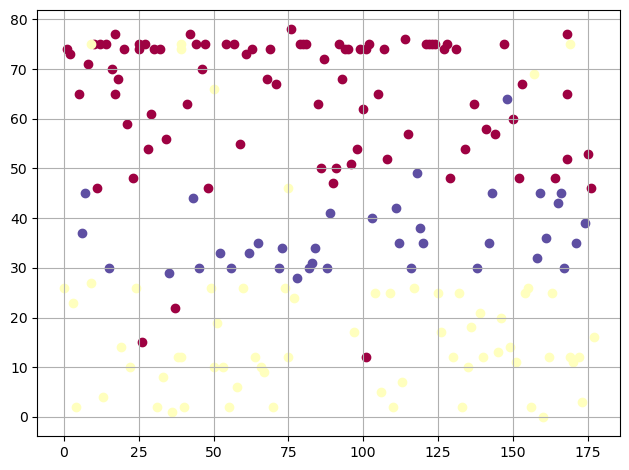

<function __main__.hier(n=3, affinity='manhatten', linkage='complete', grid=False, column1=0, column2=1)>

In [29]:
import ipywidgets # for interactive chart
ipywidgets.interact(hier,n=(np.arange(2,8)),column1=(np.arange(0,24)),column2=(np.arange(0,24)),linkage=['ward','complete','single','average'],grid=False,affinity=['euclidean','l1,l2','manhattan','cosine','precomputed'])